In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


Missingno library is used  to Identify and Visualise Missing Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
plt.rcParams['figure.figsize']=15,5

# Columns describtions

Timestamp: Date and time when form was submitted

Age: Respondent's age

Primary streaming service: Respondent's primary streaming service

Hours per day: Number of hours the respondent listens to music per day

While working: Does the respondent listen to music while studying/working?

Instrumentalist: Does the respondent play an instrument regularly?

Composer: Does the respondent compose music?

Fav genre: Respondent's favorite or top genre

Exploratory: Does the respondent actively explore new artists/genres?

Foreign languages: Does the respondent regularly listen to music with lyrics in a language they are not fluent in?

BPM: Beats per minute of favorite genre

Frequency []: How frequently the respondent listens to  music

Anxiety: Self-reported anxiety, on a scale of 0-10

Depression: Self-reported depression, on a scale of 0-10

Insomnia: Self-reported insomnia, on a scale of 0-10

OCD: Self-reported OCD, on a scale of 0-10

Music effects:Does music improve/worsen respondent's mental health conditions?

Permissions: Permissions to publicize data


In [3]:
df=pd.read_csv("Music-and-Therapy-survey-1.csv")
df.head(2)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


In [4]:
df.shape

(736, 33)

In [5]:
df.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

There are 129 Nan values, which present 17.5% of the total data

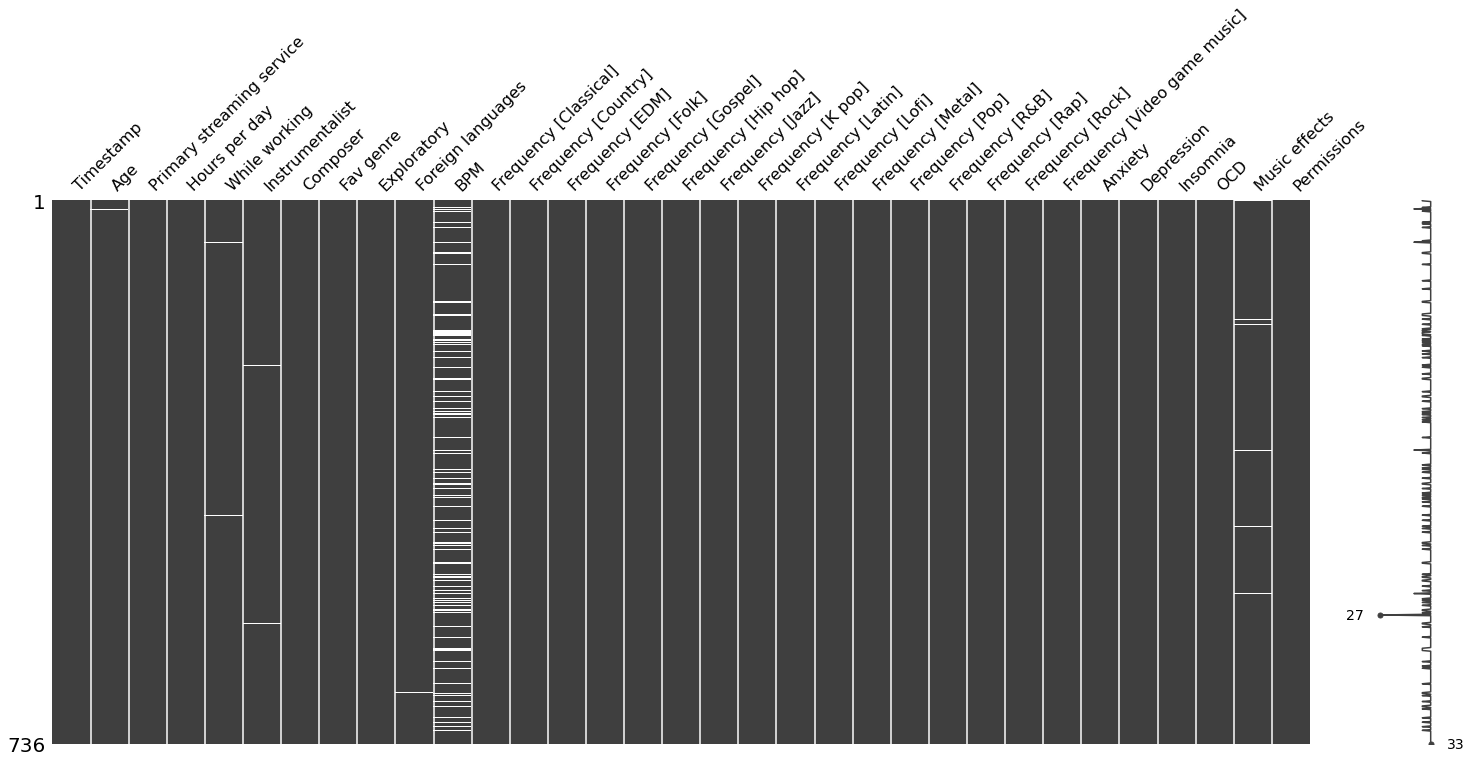

In [6]:
msno.matrix(df)
plt.show()

The graph shows that most missing values are from BPM column. The missing values are missing completely at random, which are caused by data entery errors when inputting data.

# Missing Data

I'll replace missind data in BPM columns with median, and the other missing data presents only 2.9% of the data, wich is less than 5%, so I'll drop them.

In [7]:
df["BPM"]=df["BPM"].fillna(df["BPM"].median())

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

Now, there is no missing values

In [10]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392881e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


It's obvious that Respondent's range are in twenties. Average hours that respondent listens to music per day is 3.5. Median value for Anxiety, Depression, Insomnia, and OCD are 6,5,3,and 2, respectively. BPM shows error in reading 

Permissions have only one unique value, so I'll drop it

In [11]:
df=df.drop("Permissions",axis=1)

# Age

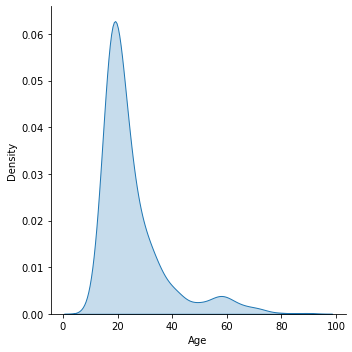

In [12]:
sns.displot(df["Age"],kind="kde",fill=True)
plt.show()

The graph distribution shows average age range of 20. 

I want to calssify Ages into groups:

Age Group classification:

Child: 0-16

Young Adult: 17-30

Middle_age Adult: 31-45

Old_Age Adults: Above 45

https://www.semanticscholar.org/paper/Human-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil/19ddb412336ce633c1fe21544605c7bd65ff8d66

In [13]:
ranges = [0,16,30,45,np.inf]
group_names = ['0-16','17-30','31-45','45+']
df['Age_group'] = pd.cut(df['Age'], bins=ranges,labels=group_names)

In [14]:
df[["Age","Age_group"]]

,Age,Age_group
2,18.0,17-30
3,61.0,45+
4,18.0,17-30
5,18.0,17-30
6,18.0,17-30
...,...,...
731,17.0,17-30
732,18.0,17-30
733,19.0,17-30
734,19.0,17-30


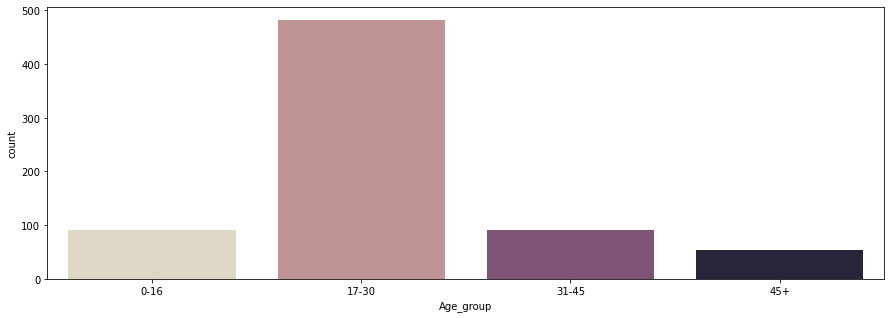

In [15]:
sns.countplot(x="Age_group",data=df,palette="ch:s=-.2,r=.6")
plt.show()

the grhaph shows that most Respondent's are classified as young adult

# Primary streaming service

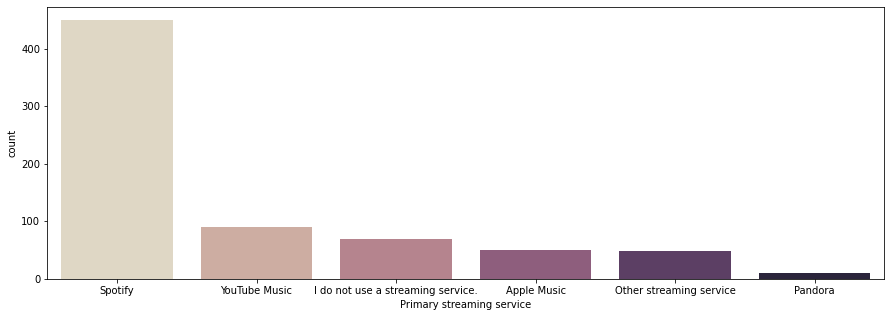

In [16]:
sns.countplot(x="Primary streaming service",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are listening to music through Spotify streaming service

# Hours per day

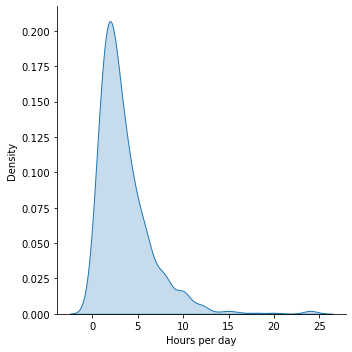

In [17]:
sns.displot(df["Hours per day"],kind="kde",fill=True)
plt.show()

On average, Respondents listen to music around 2-3 hours per day

# While working

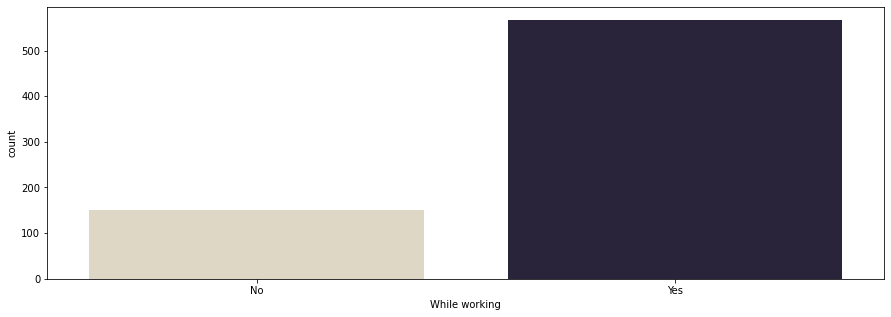

In [18]:
sns.countplot(x="While working",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents listen to music while working

# Instrumentalist

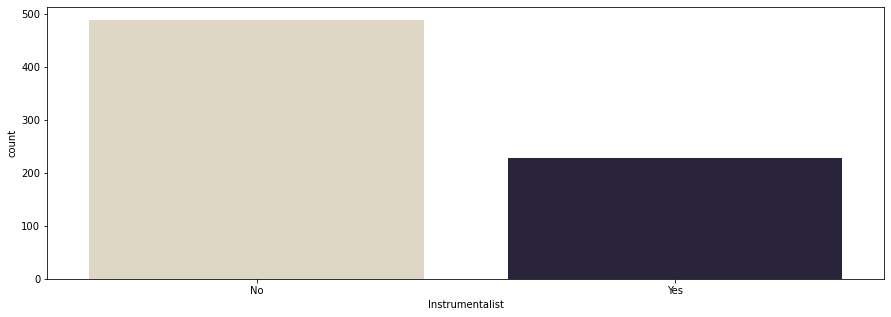

In [19]:
sns.countplot(x="Instrumentalist",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents don't play an instrument regularly

# Composer

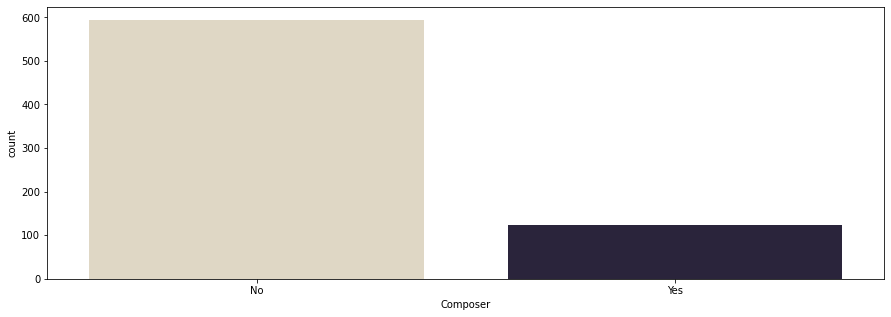

In [20]:
sns.countplot(x="Composer",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents don't compose music

# Fav genre

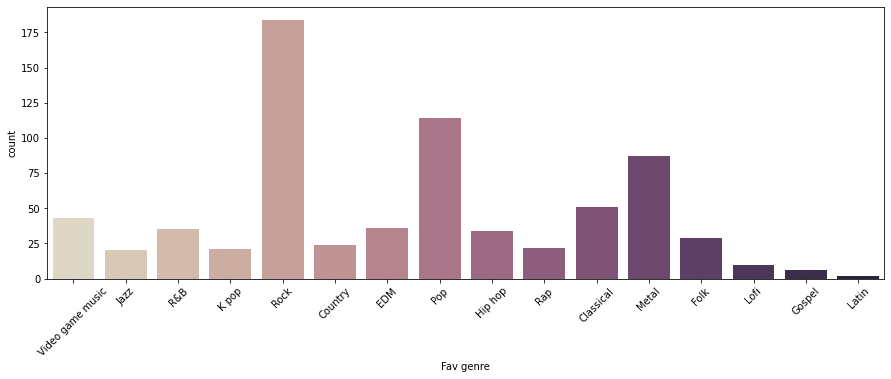

In [21]:
sns.countplot(x="Fav genre",data=df,palette="ch:s=-.2,r=.6")
plt.xticks(rotation=45)
plt.show()

Most Respondents prefare Rock,Pop,and Metal music genre. Latin music is the least prefare music.

# Exploratory

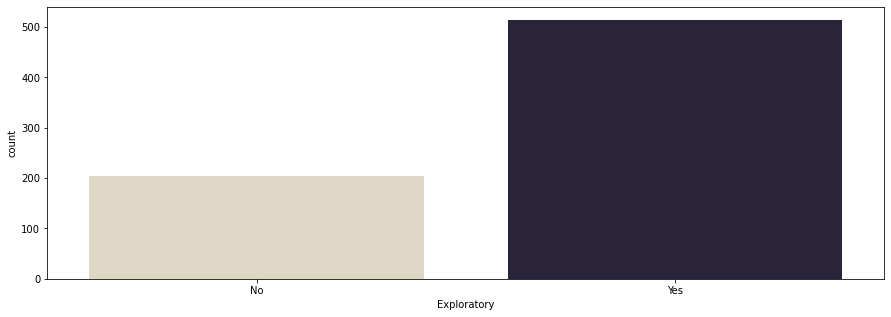

In [22]:
sns.countplot(x="Exploratory",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are exploring new artists/genres

# Foreign languages

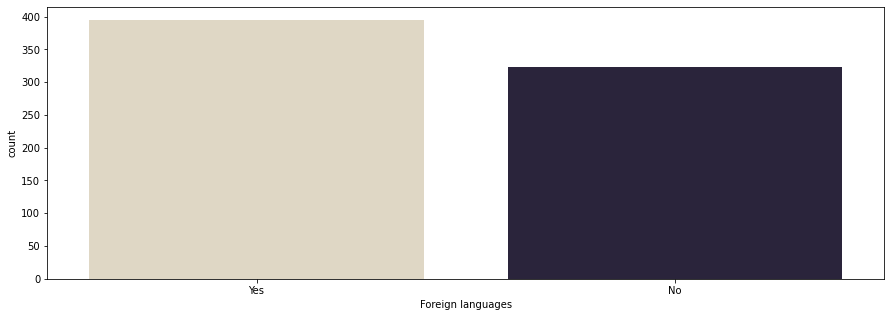

In [23]:
sns.countplot(x="Foreign languages",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents listen to music with lyrics in a language they are not fluent in

# BPM

Beats per minute can be classified as:

Dub: 60-90 bpm

Hip-hop: 60-100 bpm

House: 115-130 bpm

Techno/trance: 120-140 bpm

Dubstep: 135-145 bpm

Drum and bass: 160-180 bpm

https://learningmusic.ableton.com/make-beats/tempo-and-genre.html

Grave – slow and solemn (20–40 BPM)

Lento – slowly (40–45 BPM)

Largo – broadly (45–50 BPM)

Adagio – slow and stately (literally, “at ease”) (55–65 BPM)

Adagietto – rather slow (65–69 BPM)

Andante – at a walking pace (73–77 BPM)

Moderato – moderately (86–97 BPM)

Allegretto – moderately fast (98–109 BPM)

Allegro – fast, quickly and bright (109–132 BPM)

Vivace – lively and fast (132–140 BPM)

Presto – extremely fast (168–177 BPM)

Prestissimo – even faster than Presto (178 BPM and over)

https://symphonynovascotia.ca/faqs/symphony-101/how-do-musicians-know-how-fast-to-play-a-piece-and-why-are-the-terms-in-italian/#:~:text=Moderato%20%E2%80%93%20moderately%20(86%E2%80%9397,fast%20(132%E2%80%93140%20BPM)

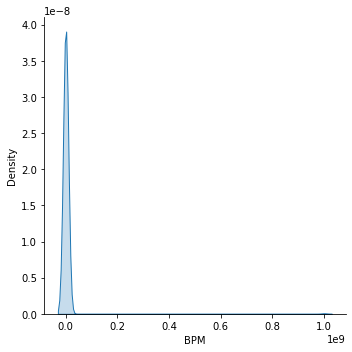

In [24]:
sns.displot(df["BPM"],kind="kde",fill=True)
plt.show()

There are 5 outlier values that affect the data, so I'll drop them:

Index (639,524,339) are zero values

Index (568,644) have very high BPM 


In [25]:
df=df.drop([568,644,639,524,339],axis=0)

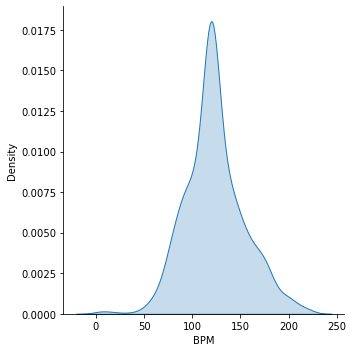

In [26]:
sns.displot(df["BPM"],kind="kde",fill=True)
plt.show()

Now,The graph shows a normal distribution, with an average BPM of 100-125 BPM 

# Frequency [Classical]

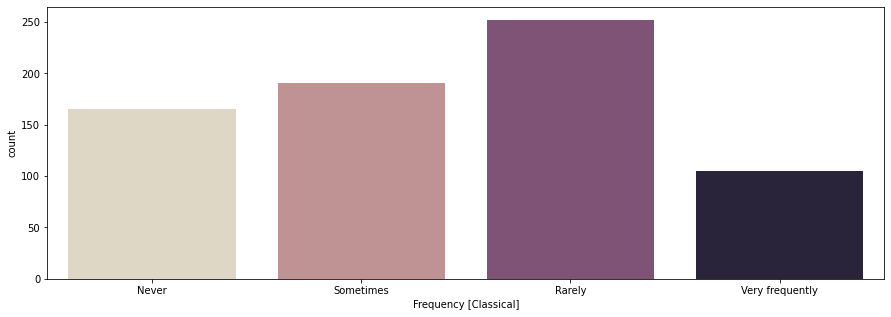

In [27]:
sns.countplot(x="Frequency [Classical]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are rarely listen to classic music

# Frequency [Country]

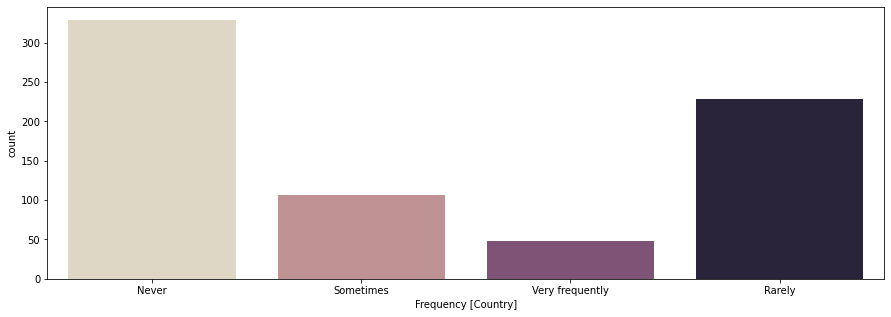

In [28]:
sns.countplot(x="Frequency [Country]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to country music, and few Respondents listen frequently to it

# Frequency [EDM]

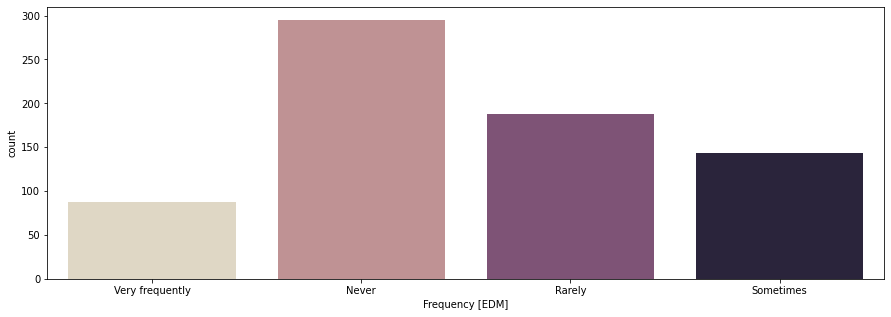

In [29]:
sns.countplot(x="Frequency [EDM]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to EDM music, and few Respondents listen frequently to it

# Frequency [Folk]

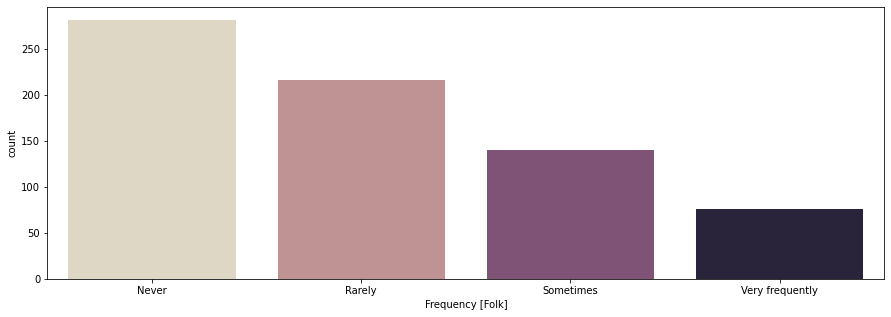

In [30]:
sns.countplot(x="Frequency [Folk]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to EDM music, and few Respondents listen frequently to it

# Frequency [Gospel]

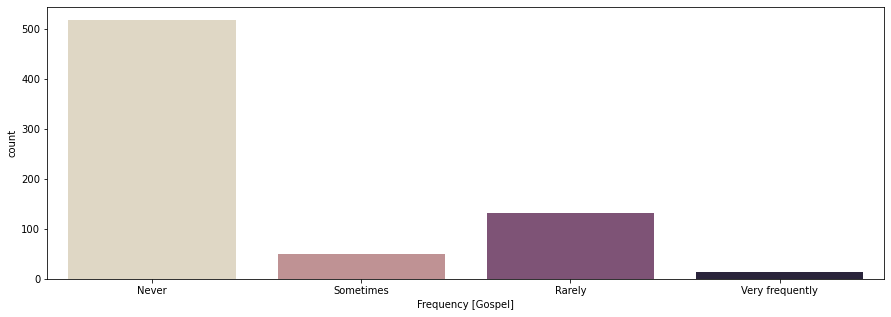

In [31]:
sns.countplot(x="Frequency [Gospel]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to Gospel music, and few Respondents listen frequently to it

# Frequency [Hip hop]

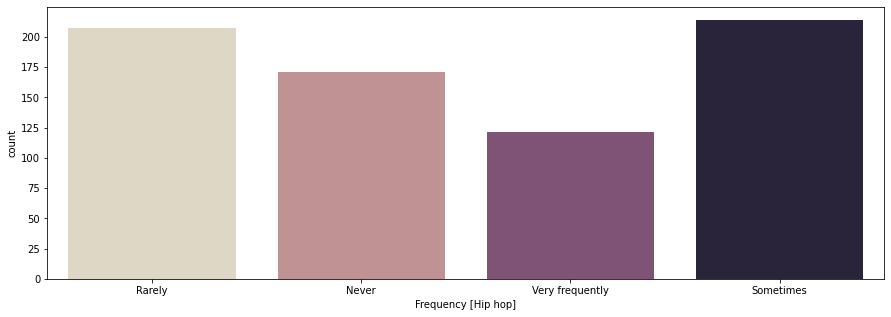

In [32]:
sns.countplot(x="Frequency [Hip hop]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are sometimes listen to Hip hop music

# Frequency [Jazz]

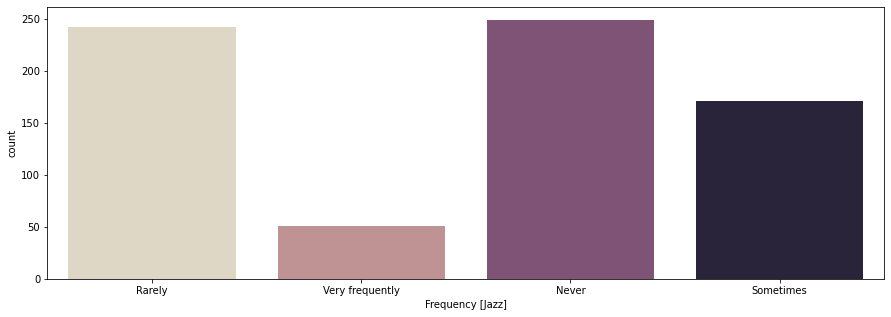

In [33]:
sns.countplot(x="Frequency [Jazz]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to Jazz music, and few Respondents listen frequently to it

# Frequency [K pop]

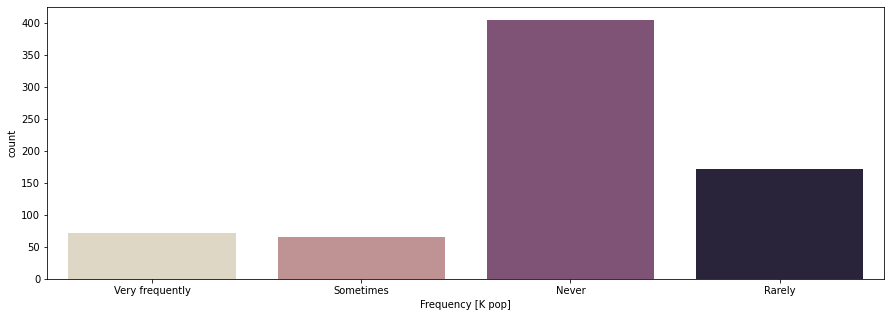

In [34]:
sns.countplot(x="Frequency [K pop]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to K pop music,

# Frequency [Latin]

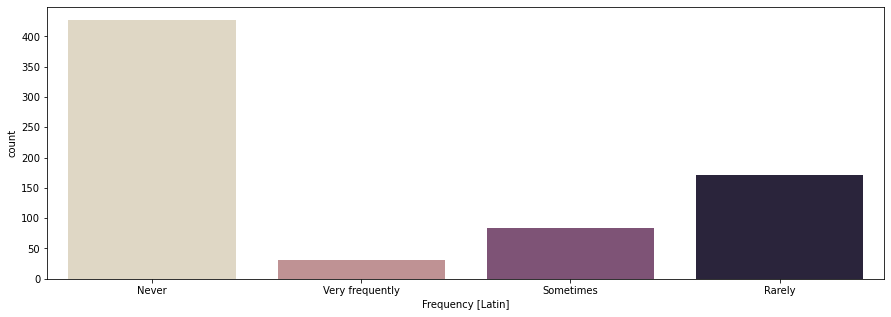

In [35]:
sns.countplot(x="Frequency [Latin]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to latin music, and few Respondents listen frequently to it

# Frequency [Lofi]

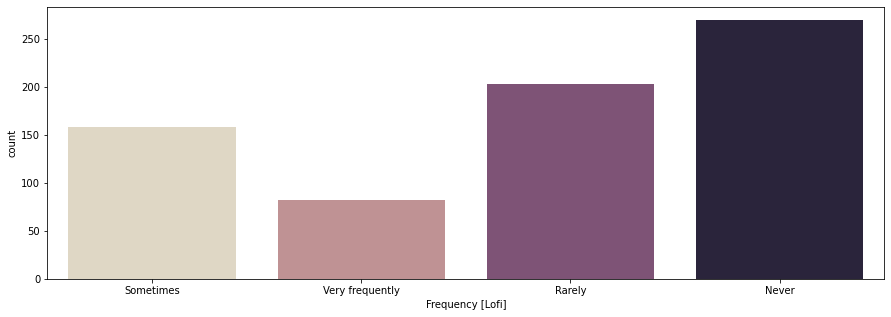

In [36]:
sns.countplot(x="Frequency [Lofi]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to lofi music, and few Respondents listen frequently to it

# Frequency [Metal]

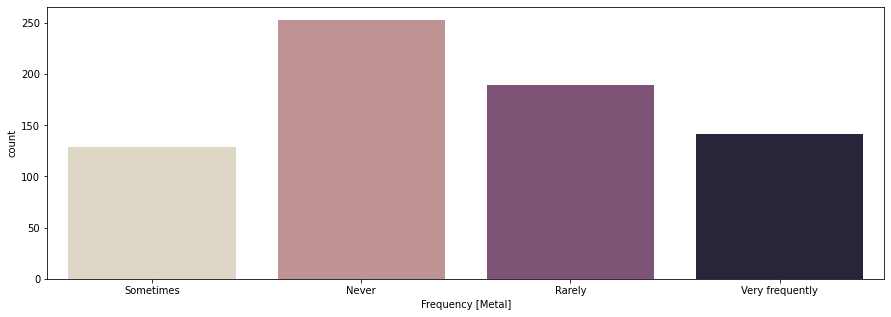

In [37]:
sns.countplot(x="Frequency [Metal]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to Metal music

# Frequency [Pop]

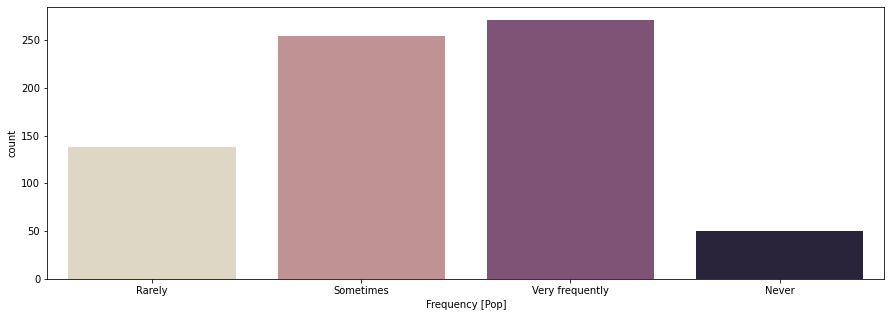

In [38]:
sns.countplot(x="Frequency [Pop]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are frequently listen to Pop music

# Frequency [R&B]

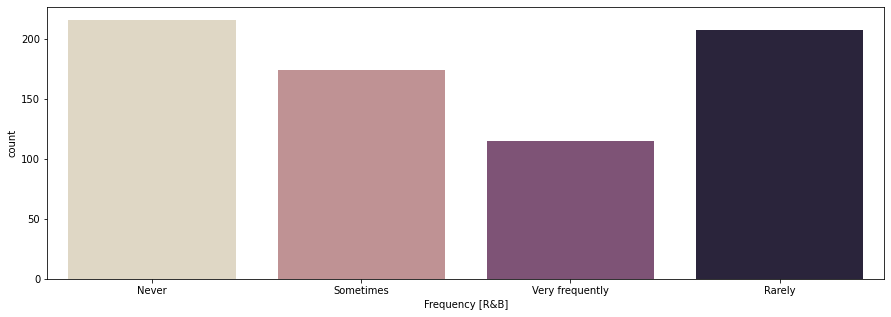

In [39]:
sns.countplot(x="Frequency [R&B]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never and rarely listen to R&B music

# Frequency [Rap]

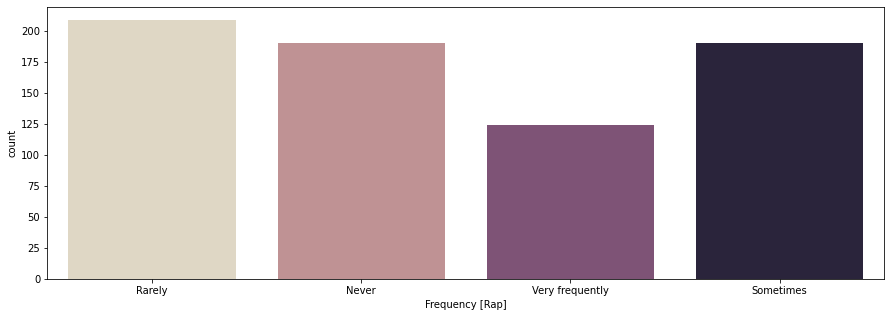

In [40]:
sns.countplot(x="Frequency [Rap]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are rarely listen to Rab music

# Frequency [Rock]

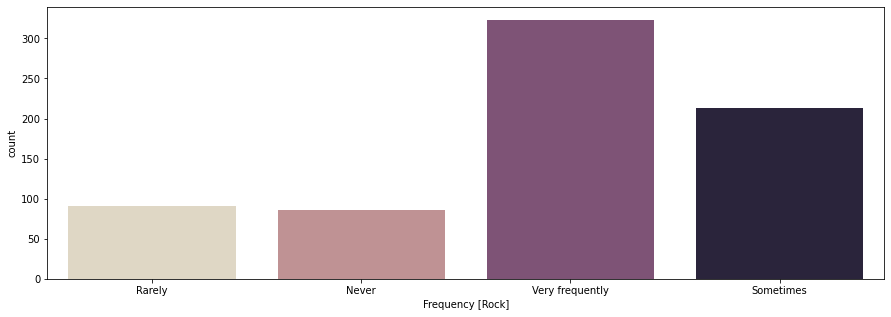

In [41]:
sns.countplot(x="Frequency [Rock]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are frequently listen to Rock music

# Frequency [Video game music]

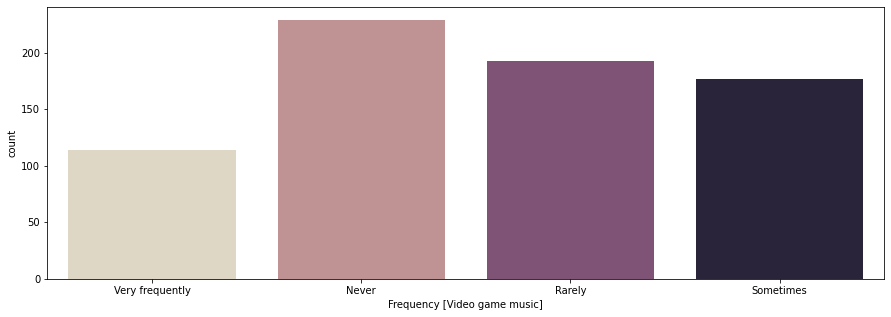

In [42]:
sns.countplot(x="Frequency [Video game music]",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents are never listen to Video game music

# Anxiety

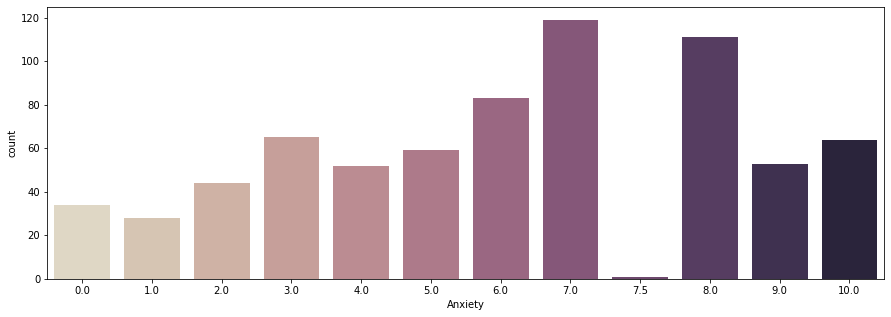

In [43]:
sns.countplot(x="Anxiety",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents have grade 7 and 8 of anxsiety, and there are little persons with 7.5 grade of anxsity 

# Depression

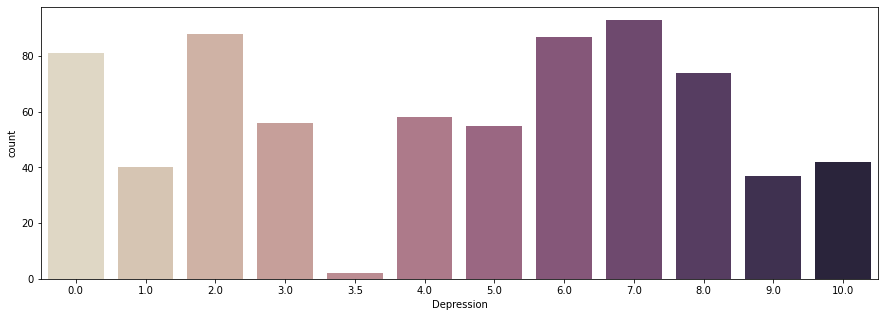

In [44]:
sns.countplot(x="Depression",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents have grade 7 and 8 of depression, and there are little persons with 3.5 grade of depression

# Insomnia

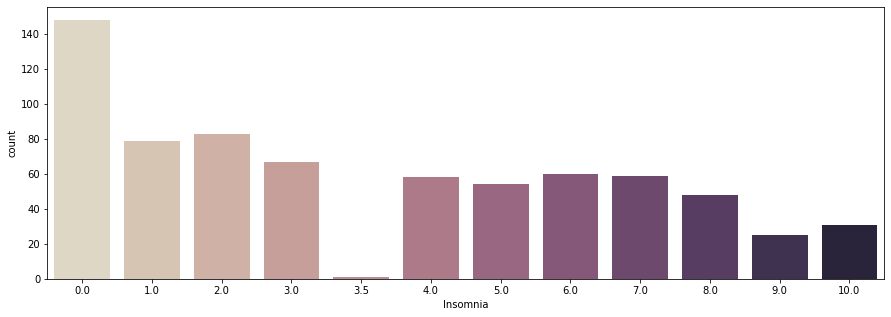

In [45]:
sns.countplot(x="Insomnia",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents doesn't have insomnia, and there are little persons with 3.5 grade of insomnia

# OCD (Obsessive compulsive disorder)

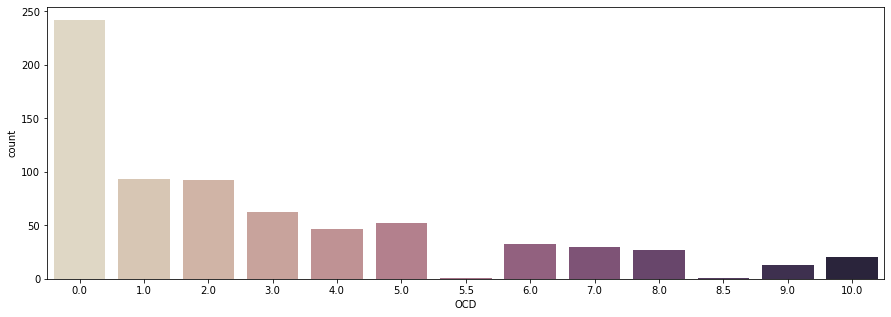

In [46]:
sns.countplot(x="OCD",data=df,palette="ch:s=-.2,r=.6")
plt.show()

Most Respondents doesn't have OCD

# Music effects

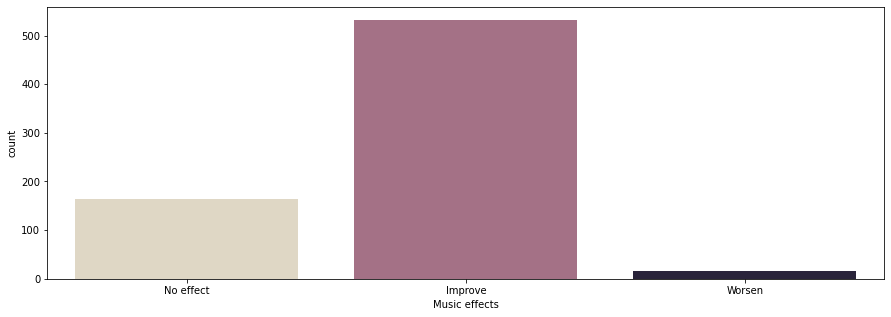

In [47]:
sns.countplot(x="Music effects",data=df,palette="ch:s=-.2,r=.6")
plt.show()

The graph shows that music does improve mental health conditions, and just few cases shows music worsen their mental health 

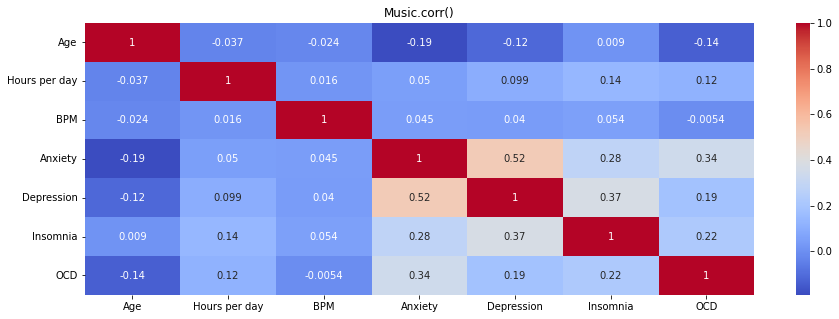

In [48]:
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title("Music.corr()")
plt.show()

The map shows a realtionship between Anxity and Depression

___

# Relationship between Hours per day VS. Fav genre 

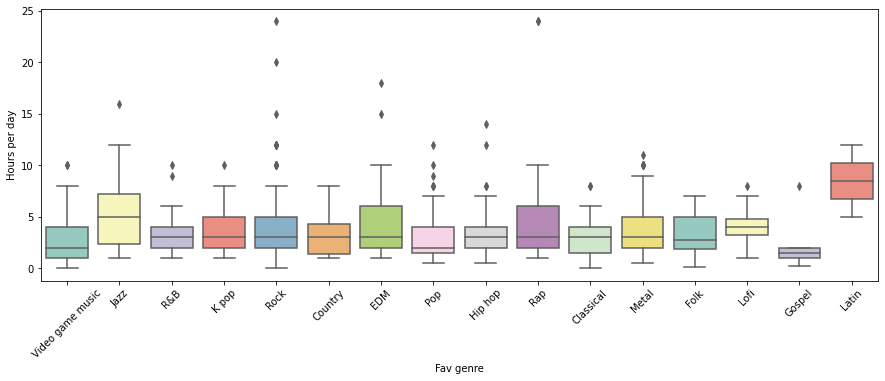

In [49]:
sns.boxplot(x="Fav genre",y="Hours per day",data=df,palette="Set3")
plt.xticks(rotation=45)
plt.show()

The graph shows that Respondents whose fav genre is latin music, listen to music more often than the others.    

# Relationship between BPM VS. Fav genre

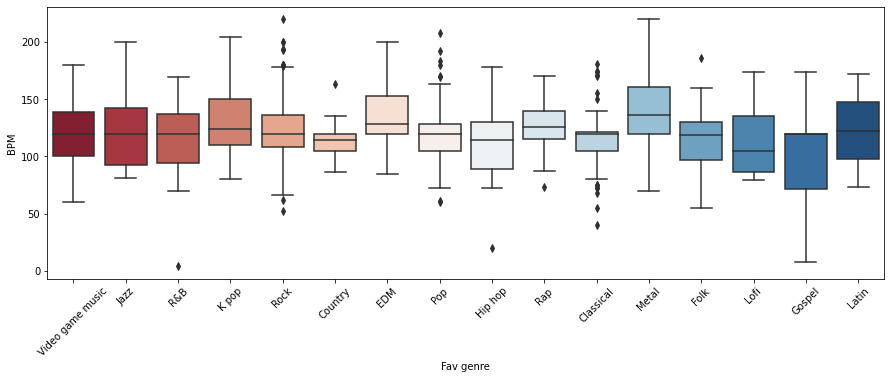

In [50]:
sns.boxplot(x="Fav genre",y="BPM",data=df,palette="RdBu")
plt.xticks(rotation=45)
plt.show()

Almost all genres have median BPM range between (100-150)

# Relationship between Anxiety,Depression,Insomnia,and OCD VS. Fav genre

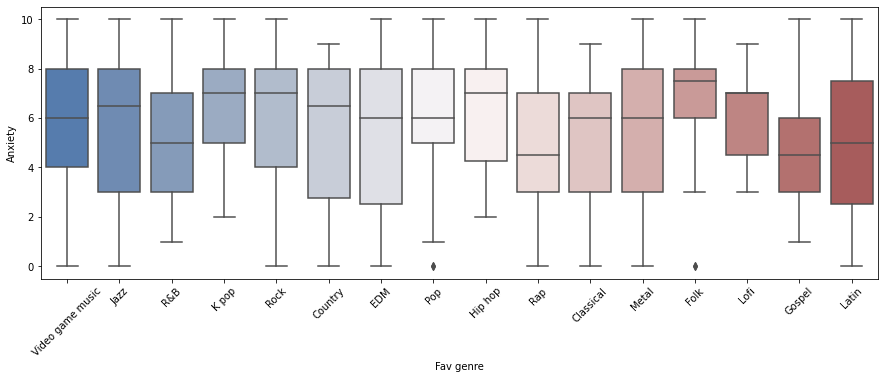

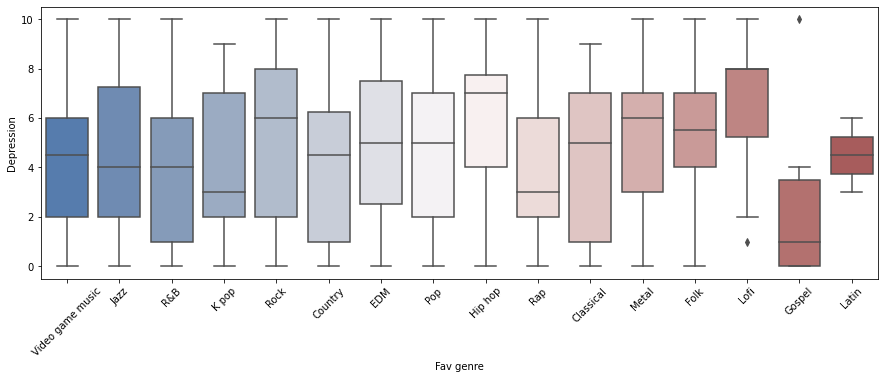

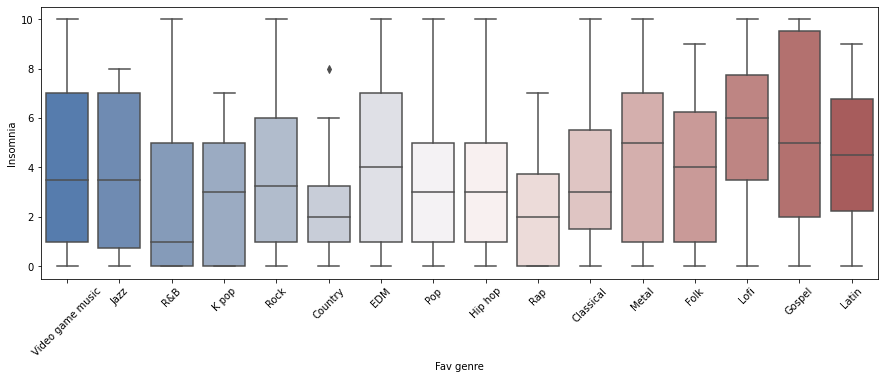

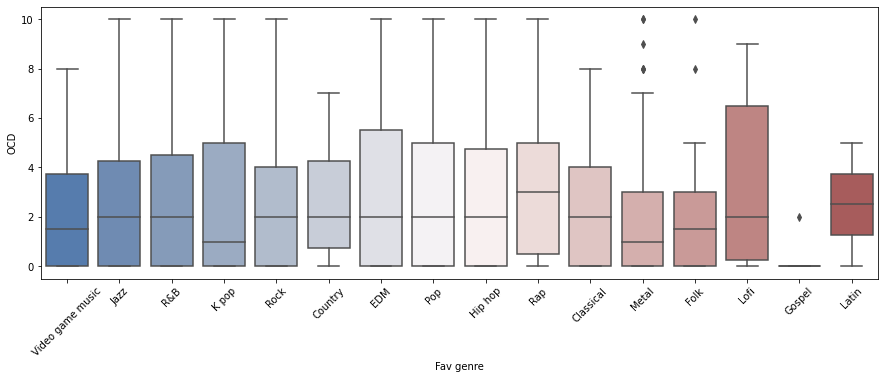

In [51]:
sns.boxplot(x="Fav genre",y="Anxiety",data=df,palette="vlag")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Fav genre",y="Depression",data=df,palette="vlag")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Fav genre",y="Insomnia",data=df,palette="vlag")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Fav genre",y="OCD",data=df,palette="vlag")
plt.xticks(rotation=45)
plt.show()



Graph1 shows that Respondents whose fav genre is Folk music has hisgher Anxiety than the other with median of 7, and the average median anxity for fav ganre between (5-7).

Graph2 shows that Respondents whose fav genre is Gospel music has lower depression with median of 1. On the other hand, respondents whose fav genre is Hip hop music has higher depression with median of 7 , and the average median Depression for fav ganre between (3-6).

Graph3 shows that Respondents whose fav genre is R&B music has lower depression with median of 1. On the other hand, respondents whose fav genre is Lofi music has higher depression with median of 6 , and the average median Depression for fav ganre between (2-5).

Graph3 shows that Respondents whose fav genre is Gospel music has almost no OCD, and the average median Depression for fav ganre between (1-3).

Comclusion: Respondents whose fav genre is Gospel music has lower depression and OCD.

# Relationship between Anxiety,Depression,Insomnia,and OCD VS. BPM

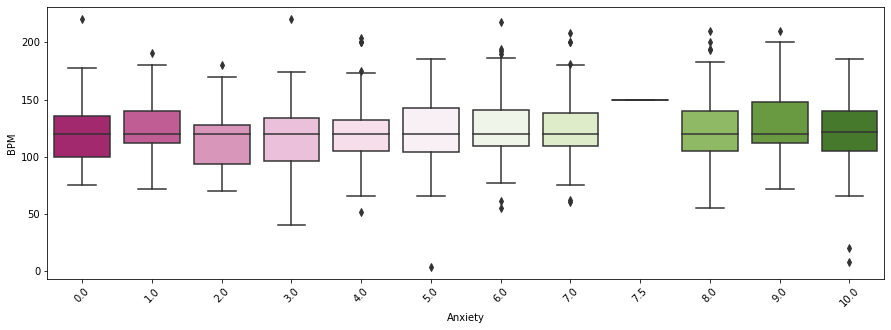

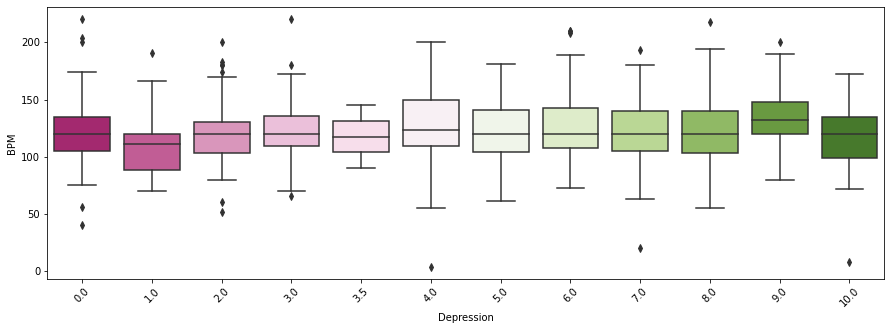

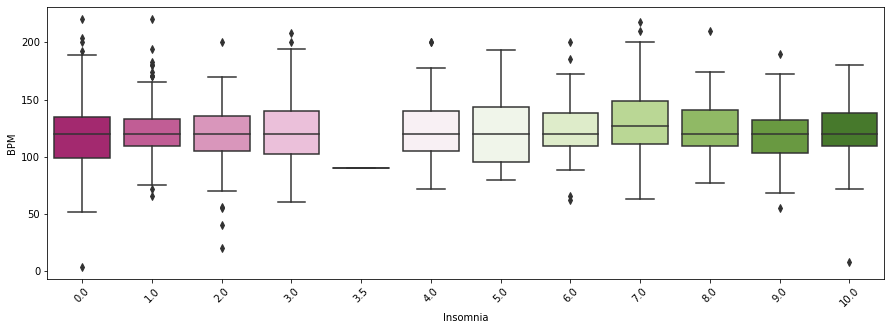

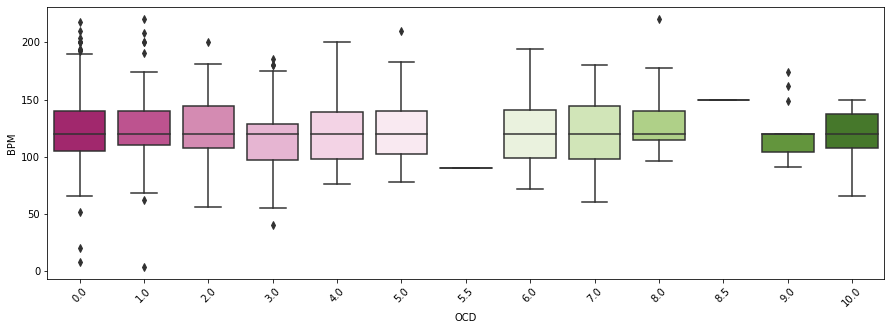

In [52]:
sns.boxplot(y="BPM",x="Anxiety",data=df,palette="PiYG")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y="BPM",x="Depression",data=df,palette="PiYG")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y="BPM",x="Insomnia",data=df,palette="PiYG")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y="BPM",x="OCD",data=df,palette="PiYG")
plt.xticks(rotation=45)
plt.show()


There is no ralationship between Anxiety,Depression,Insomnia,and OCD & BPM.

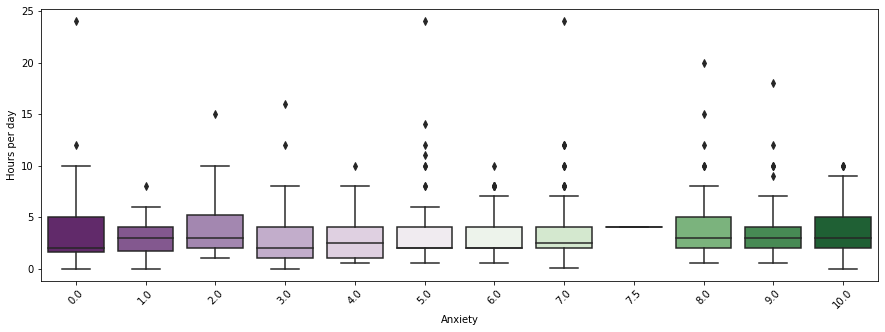

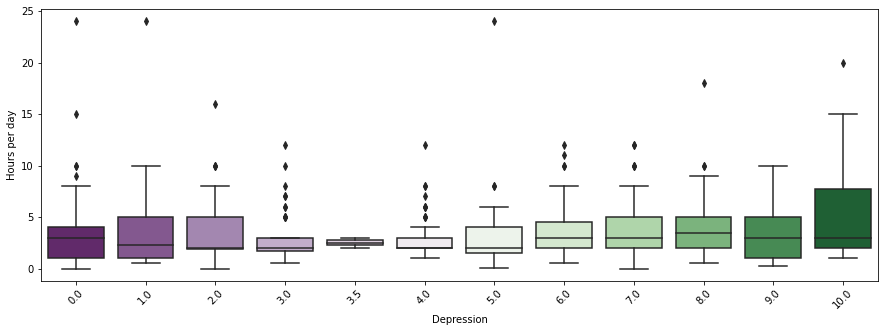

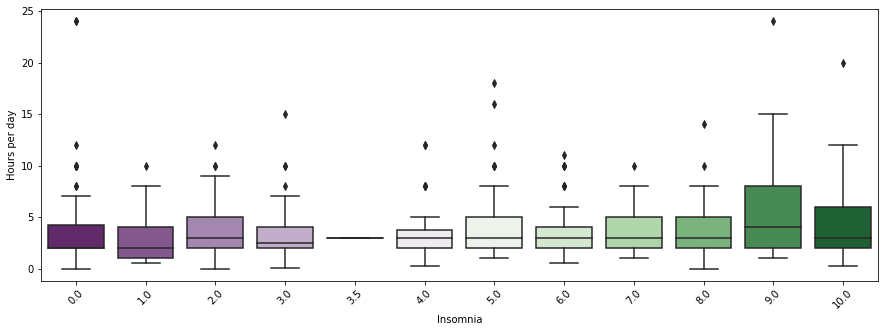

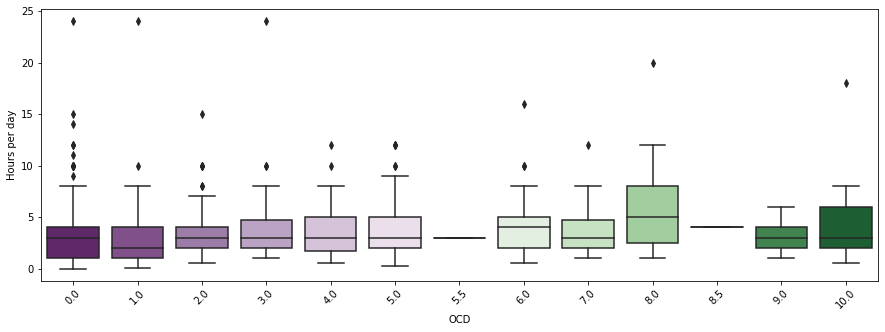

In [53]:
sns.boxplot(y="Hours per day",x="Anxiety",data=df,palette="PRGn")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y="Hours per day",x="Depression",data=df,palette="PRGn")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y="Hours per day",x="Insomnia",data=df,palette="PRGn")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y="Hours per day",x="OCD",data=df,palette="PRGn")
plt.xticks(rotation=45)
plt.show()


There is no ralationship between Anxiety,Depression,Insomnia,and OCD & Hours per day.

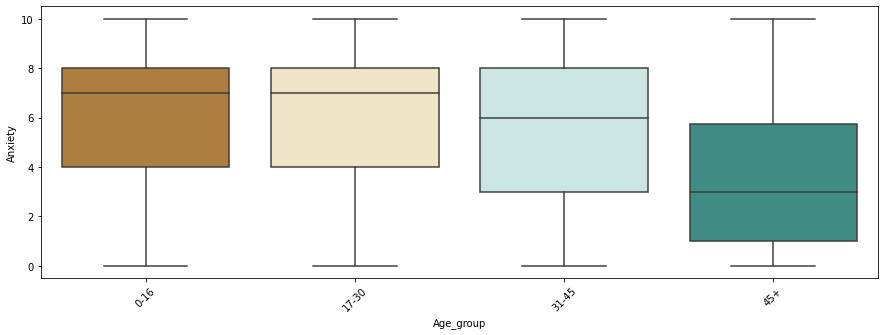

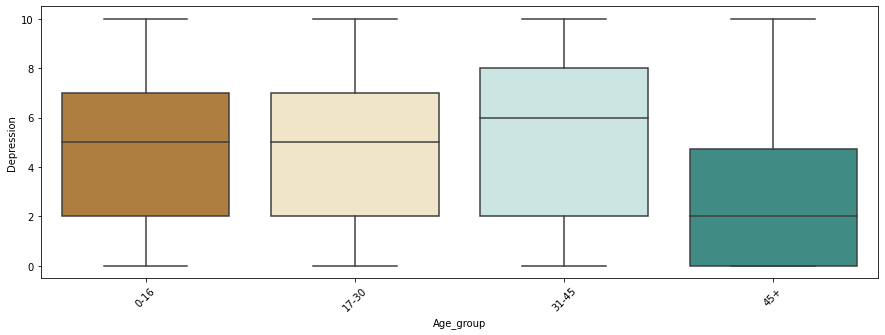

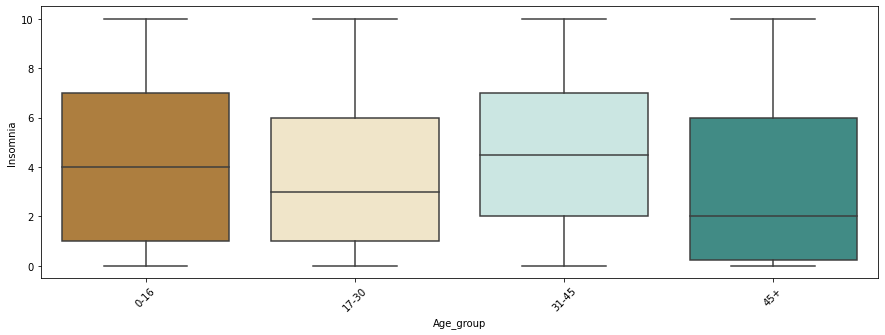

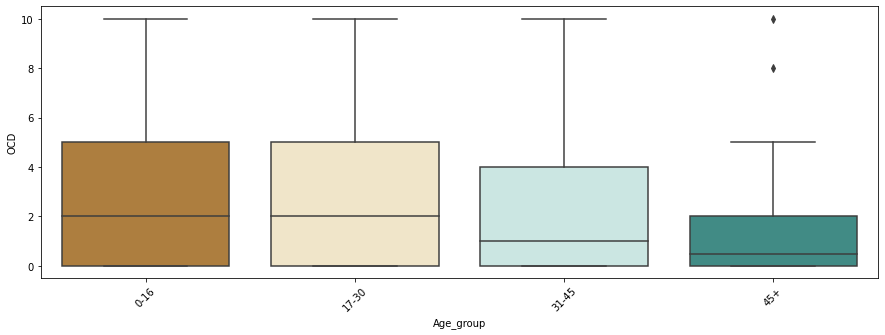

In [54]:
sns.boxplot(x="Age_group",y="Anxiety",data=df,palette="BrBG")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Age_group",y="Depression",data=df,palette="BrBG")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Age_group",y="Insomnia",data=df,palette="BrBG")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="Age_group",y="OCD",data=df,palette="BrBG")
plt.xticks(rotation=45)
plt.show()

Younger respondents have high Anxiety than the older respondents. 

Middle_age Adult whose age between (31-45) have high anxity,depression, and Insomnia. 

Old_Age Adults has lower anxity,depression,Insomnia, and OCD than the younger respondents.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'Country'),
  Text(6, 0, 'EDM'),
  Text(7, 0, 'Pop'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Rap'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

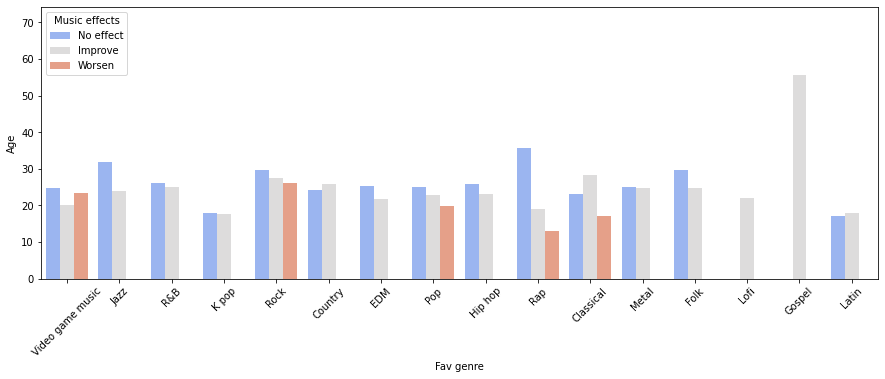

In [55]:
sns.barplot(x=df['Fav genre'], y=df['Age'], hue=df['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=45)

The graph shows that respondents whose shown worsen in their case, thier fav genre are video game music,Rock,Pop,Rap and Classical. and most of respondents whose shown improve in thier case, thier fav genre is Gospel. 

data shape

Age Group: 

Dealing with missing data: droped less than 5%, and replace BPM with median

Outlier: BPM has 5 values that affected data, so I dropped them 

Most listining: spotify

Used Libraries: pandas, numpy, matplotlib, missingo

Avrg listining to music: 2-3 hrs/day